In [2]:
import pandas as pd 
from scipy.io import arff
from rulekit import RuleKit
from rulekit.survival import SurvivalRules
from rulekit.params import Measures

from rulexai.explainer import RuleExplainer

# GBSG2

## Read data

In [3]:
dataset_path = "./data/GBSG2.arff"
data = pd.DataFrame(arff.loadarff(dataset_path)[0])

# code to change encoding of the file
tmp_df = data.select_dtypes([object])
tmp_df = tmp_df.stack().str.decode("utf-8").unstack()
for col in tmp_df:
    data[col] = tmp_df[col].replace({"?": None})

x = data.drop(["survival_status"], axis=1)
y = data["survival_status"]

## Train RuleKit model

In [4]:
# RuleKit
RuleKit.init()

srv = SurvivalRules(survival_time_attr="survival_time")
srv.fit(values=x, labels=y)

### Rules

In [5]:
for rule in srv.model.rules:
    print(rule, rule.stats)

IF pnodes = (-inf, 3.50) THEN survival_status = {NaN} (p = 304.0, n = 0.0, P = 564.0, N = 0.0, weight = 0.9999999999999998, pvalue = 2.220446049250313e-16)
IF pnodes = (-inf, 17.50) AND progrec = (-inf, 9.50) AND age = <41.50, 52.50) AND estrec = <0.50, 29) THEN survival_status = {NaN} (p = 21.0, n = 0.0, P = 564.0, N = 0.0, weight = 0.9999999999909083, pvalue = 9.09172737095787e-12)
IF pnodes = <4.50, 19) AND progrec = (-inf, 11.50) AND age = <41.50, 64.50) AND estrec = <0.50, 41) THEN survival_status = {NaN} (p = 33.0, n = 0.0, P = 564.0, N = 0.0, weight = 1.0, pvalue = 0.0)
IF pnodes = <4.50, inf) AND progrec = (-inf, 25.50) THEN survival_status = {NaN} (p = 113.0, n = 0.0, P = 564.0, N = 0.0, weight = 1.0, pvalue = 0.0)
IF pnodes = <4.50, inf) AND progrec = (-inf, 99) THEN survival_status = {NaN} (p = 156.0, n = 0.0, P = 564.0, N = 0.0, weight = 1.0, pvalue = 0.0)
IF pnodes = <5.50, inf) AND progrec = (-inf, 135) THEN survival_status = {NaN} (p = 144.0, n = 0.0, P = 564.0, N = 0.0,

## RuleXAI

In [6]:
explainer = RuleExplainer(model=srv, X=x, y=y, type="survival")
explainer.explain()

### Feature importance 

In [7]:
explainer.feature_importances_

,attributes,importances
2,pnodes,460.222804
3,progrec,251.499862
0,age,20.523849
1,estrec,13.347720


### Condition importance

In [8]:
explainer.condition_importances_

,conditions,importances
0,"pnodes = <4.5, inf)",207.268572
1,"pnodes = (-inf, 3.5)",67.394775
2,"pnodes = <5.5, inf)",64.254026
3,"pnodes = <3.5, inf)",64.104973
4,"progrec = (-inf, 25.5)",48.923100
5,"progrec = <107.0, inf)",37.252374
6,"progrec = (-inf, 105.5)",33.962572
7,"progrec = (-inf, 99.0)",33.423755
8,"pnodes = (-inf, 4.5)",32.835122
9,"progrec = (-inf, 135.0)",25.353218


### Local explainability

Example:
horTh                  no
age                  70.0
menostat             Post
tsize                21.0
tgrade                 II
pnodes                3.0
progrec              48.0
estrec               66.0
survival_time      1814.0
survival_status       1.0
Name: 0, dtype: object

Rules that covers this example:
IF pnodes = (-inf, 3.5) THEN survival_status = {NaN}
IF pnodes = (-inf, 4.5) AND progrec = <9.0, inf) AND age = <39.5, inf) THEN survival_status = {NaN}

Importances of the conditions from rules covering the example
             conditions  importances
0  pnodes = (-inf, 3.5)    67.394775
1  pnodes = (-inf, 4.5)    32.835122
2  progrec = <9.0, inf)    13.146344
3     age = <39.5, inf)     3.171229


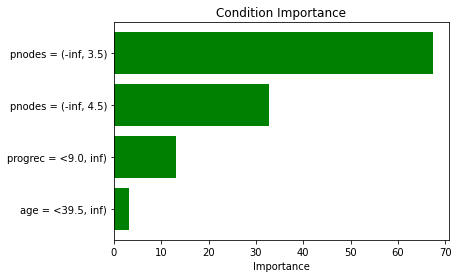

,conditions,importances
0,"pnodes = (-inf, 3.5)",67.394775
1,"pnodes = (-inf, 4.5)",32.835122
2,"progrec = <9.0, inf)",13.146344
3,"age = <39.5, inf)",3.171229


In [9]:
explainer.local_explainability(x.iloc[0, :], pd.DataFrame(y).iloc[0, :], plot = True)